In [34]:
import h5py
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, BatchNormalization, Dropout, Flatten, MaxPooling2D
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
from seaborn import heatmap
from sklearn.metrics import confusion_matrix

In [14]:
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [16]:
x_train, y_train, x_test, y_test, classes = load_dataset()

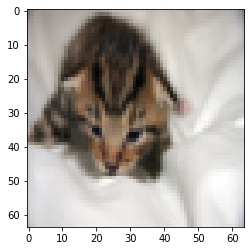

In [25]:
plt.imshow(x_test[1])

In [20]:
x_train.shape # 209 images train

(209, 64, 64, 3)

In [38]:
x_test.shape # 50 images test

(50, 64, 64, 3)

In [65]:
# normalizar
xtr1, xtst1=x_train/255, x_test/255

In [78]:
cnn=Sequential()

In [79]:
cnn.add(Conv2D(16, (3,3), padding="same", input_shape=x_train.shape[1:]))

cnn.add(Conv2D(32, (3,3), padding="same"))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(3,3))
cnn.add(Dropout(.2))

cnn.add(Conv2D(64, (3,3), padding="same"))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(3,3))
cnn.add(Dropout(.2))

cnn.add(Conv2D(128, (3,3), padding="same"))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(3,3))
cnn.add(Dropout(.2))

cnn.add(Flatten())
cnn.add(Dense(512))
cnn.add(Dense(1, activation="sigmoid"))


In [80]:
cnn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

In [81]:
y_train.shape

(1, 209)

In [82]:
cnn.fit(xtr1, np.squeeze(y_train), epochs=8, batch_size=65)

Epoch 1/8
209/209 [==============================] - 2s 12ms/step - loss: 2.2374 - acc: 0.5455
Epoch 2/8
209/209 [==============================] - 2s 7ms/step - loss: 2.1662 - acc: 0.6077
Epoch 3/8
209/209 [==============================] - 1s 6ms/step - loss: 1.3352 - acc: 0.7129
Epoch 4/8
209/209 [==============================] - 1s 6ms/step - loss: 0.9197 - acc: 0.7033
Epoch 5/8
209/209 [==============================] - 1s 6ms/step - loss: 0.7134 - acc: 0.7368
Epoch 6/8
209/209 [==============================] - 1s 6ms/step - loss: 0.4680 - acc: 0.7751
Epoch 7/8
209/209 [==============================] - 1s 6ms/step - loss: 0.4344 - acc: 0.7943
Epoch 8/8
209/209 [==============================] - 1s 6ms/step - loss: 0.3979 - acc: 0.8373


In [83]:
cnn.evaluate(xtst1, np.squeeze(y_test), batch_size=65)

50/50 [==============================] - 0s 4ms/step


[0.6436511874198914, 0.6600000262260437]

In [73]:
preds=cnn.predict_classes(xtst1)  # predict_classes se usa para modelos Sequential

In [75]:
cm=confusion_matrix(np.squeeze(y_test), preds)

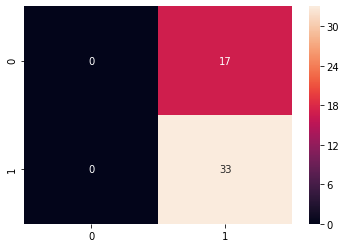

In [77]:
heatmap(cm, annot=True)